# Unit 4: Processing and Visualizing Data #

In [129]:
from shared import display_unit_toc
display_unit_toc('notebook.ipynb')

# Table of Contents

* [Unit 4: Processing and Visualizing Data](#Unit-4:-Processing-and-Visualizing-Data)
 * [Accessing Data](#Accessing-Data)
 * [Slicing and Filtering](#Slicing-and-Filtering)
 * [Concatenating](#Concatenating)
 * [Joining](#Joining)
 * [Visualizing with Matplotlib](#Visualizing-with-Matplotlib)
 * [Animations](#Animations)

In [20]:
import pandas as pd
base_url = 'https://www.basketball-reference.com/wnba/years/{season}.html#all_team'
season = 2018
url = base_url.format(season=season)
df = pd.concat(pd.read_html(url), sort=False)
df

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,PW,PL,Western Conference
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14,NaN
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13,NaN
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9,NaN
3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25,NaN
4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26,NaN
5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28,NaN
0,NaN,26,8,0.765,—,87.2,79.7,27,7,Seattle Storm
1,NaN,20,14,0.588,6.0,85.8,83.2,21,13,Phoenix Mercury
2,NaN,19,15,0.559,7.0,78.9,77.0,20,14,Los Angeles Sparks
3,NaN,18,16,0.529,8.0,78.9,78.3,18,16,Minnesota Lynx


In [18]:
d = pd.read_html(url)[0]
# d.rename()
d

,Eastern Conference,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25
4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26
5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28


In [59]:
df = pd.concat([d.rename(columns={'Eastern Conference': 'Team', 'Western Conference': 'Team'})
      for d in pd.read_html(url)])
df

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25
4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26
5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28
0,Seattle Storm,26,8,0.765,—,87.2,79.7,27,7
1,Phoenix Mercury,20,14,0.588,6.0,85.8,83.2,21,13
2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14
3,Minnesota Lynx,18,16,0.529,8.0,78.9,78.3,18,16


## Accessing Data#

To access data in a data frame, we have multiple options:

* `loc` and `[ ]` allow us to pass logical conditions or number ranges (but not single numbers in `[ ]`)
* `iloc` allows ut to grab row(s) by row number (does allow single numbers)


In [41]:
df.iloc[0:3]

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9


## Slicing and Filtering#

Using `loc` and/or `[ ]` to access data in a data frame allows us slice the data in very readable ways:

In [43]:
df[df.W > 15]

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
0,Seattle Storm,26,8,0.765,—,87.2,79.7,27,7
1,Phoenix Mercury,20,14,0.588,6.0,85.8,83.2,21,13
2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14
3,Minnesota Lynx,18,16,0.529,8.0,78.9,78.3,18,16


In [44]:
df[(df['W'] > 15) | (df['PS/G'] > 70)]

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25
4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26
5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28
0,Seattle Storm,26,8,0.765,—,87.2,79.7,27,7
1,Phoenix Mercury,20,14,0.588,6.0,85.8,83.2,21,13
2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14
3,Minnesota Lynx,18,16,0.529,8.0,78.9,78.3,18,16


In [47]:
df.loc[df.W > 15, ['Team', 'W', 'L', 'PW']]

,Team,W,L,PW
0,Atlanta Dream,23,11,20
1,Washington Mystics,22,12,21
2,Connecticut Sun,21,13,25
0,Seattle Storm,26,8,27
1,Phoenix Mercury,20,14,21
2,Los Angeles Sparks,19,15,20
3,Minnesota Lynx,18,16,18


In [52]:
df[df.Team == 'Los Angeles Sparks']

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14


## Concatenating #

`pd.concat()` combines multiple data frames vertically, i.e. row-wise. We used this to combine the two conference tables above. First, we used a list comprehension together with `rename()` to get two data frames with correctly-named columns. Then we passed the resulting list to `concat()` to merge the two data sets.

## Joining#

Often we want to combine data frames horizontally. That is, we want to add a column containing new data.

Recall that a data frame column is like a dictionary by having keys. The key here is called the index and has been appearing in the left-hand column for all our printed data frames.

Since our data frame `df` was concatenated, it duplicated indices. We could reset the indices so that they're sequential and unique using `reset_index()`:

In [69]:
df.reset_index() # need to save the result, or else we can pass inplace=True 

,index,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
3,3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25
4,4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26
5,5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28
6,0,Seattle Storm,26,8,0.765,—,87.2,79.7,27,7
7,1,Phoenix Mercury,20,14,0.588,6.0,85.8,83.2,21,13
8,2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14
9,3,Minnesota Lynx,18,16,0.529,8.0,78.9,78.3,18,16


Suppose we wanted to assemble the win counts and the 3-point shooting rates for WNBA teams over multiple seasons.

We can first start a "blank" data frame, in a sense:



In [90]:
df_wins = df.loc[:, ['Team', 'W']].rename(columns={'W': 'W_{}'.format(str(season))})
df_wins

,Team,W_2018
0,Atlanta Dream,23
1,Washington Mystics,22
2,Connecticut Sun,21
3,Chicago Sky,13
4,New York Liberty,7
5,Indiana Fever,6
0,Seattle Storm,26
1,Phoenix Mercury,20
2,Los Angeles Sparks,19
3,Minnesota Lynx,18


We'll also set the index to be the column `Team`, which will be important for joining in a moment.

In [94]:
df_wins.set_index('Team', inplace=True)
df_wins

,W_2018
Team,
Atlanta Dream,23
Washington Mystics,22
Connecticut Sun,21
Chicago Sky,13
New York Liberty,7
Indiana Fever,6
Seattle Storm,26
Phoenix Mercury,20
Los Angeles Sparks,19


Now that we've assembled the wins for one season, we can organize our code into a function that will generalize this process to other seasons:

In [45]:
def get_season_wins(season):
    url = base_url.format(season=season)
    df = pd.concat([d.rename(columns={'Eastern Conference': 'Team', 'Western Conference': 'Team'})
                            for d in pd.read_html(url)])
    df['Team'] = [t.replace('*', '') for t in df.Team.values]
    df = df.loc[:, ['Team', 'W']].rename(columns={'W': 'W_{}'.format(str(season))})
    df = df.set_index('Team')
    return df

get_season_wins(2018)

,W_2018
Team,
Atlanta Dream,23
Washington Mystics,22
Connecticut Sun,21
Chicago Sky,13
New York Liberty,7
Indiana Fever,6
Seattle Storm,26
Phoenix Mercury,20
Los Angeles Sparks,19


In [6]:
df_wins_2018 = get_season_wins(2018)
df_wins_2017 = get_season_wins(2017)
print(df_wins_2017)

df_wins = df_wins_2018.join(df_wins_2017, lsuffix=True)
df_wins

                    W_2017
Team                      
New York Liberty        22
Connecticut Sun         21
Washington Mystics      18
Atlanta Dream           12
Chicago Sky             12
Indiana Fever            9
Minnesota Lynx          27
Los Angeles Sparks      26
Phoenix Mercury         18
Dallas Wings            16
Seattle Storm           15
San Antonio Stars        8


,W_2018,W_2017
Team,,
Atlanta Dream,23,12.0
Washington Mystics,22,18.0
Connecticut Sun,21,21.0
Chicago Sky,13,12.0
New York Liberty,7,22.0
Indiana Fever,6,9.0
Seattle Storm,26,15.0
Phoenix Mercury,20,18.0
Los Angeles Sparks,19,26.0


In [47]:
df_wins = get_season_wins(2018)
# df.columns = ['Team']

for season in range(2016, 2000, -1):
    print('Processing season ', season)
    df_wins_this_season = get_season_wins(season)
    df_wins = df_wins.join(df_wins_this_season)

df_wins

Processing season  2016
Processing season  2015
Processing season  2014
Processing season  2013
Processing season  2012
Processing season  2011
Processing season  2010
Processing season  2009
Processing season  2008
Processing season  2007
Processing season  2006
Processing season  2005
Processing season  2004
Processing season  2003
Processing season  2002
Processing season  2001


,W_2018,W_2016,W_2015,W_2014,W_2013,W_2012,W_2011,W_2010,W_2009,W_2008,W_2007,W_2006,W_2005,W_2004,W_2003,W_2002,W_2001
Team,,,,,,,,,,,,,,,,,
Atlanta Dream,23,17.0,15.0,19.0,17.0,19.0,20.0,19.0,18.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Washington Mystics,22,13.0,18.0,16.0,17.0,5.0,6.0,22.0,16.0,10.0,16.0,18.0,16.0,17.0,9.0,17.0,10.0
Connecticut Sun,21,14.0,15.0,13.0,10.0,25.0,21.0,17.0,16.0,21.0,18.0,26.0,26.0,18.0,18.0,NaN,NaN
Chicago Sky,13,18.0,21.0,15.0,24.0,14.0,14.0,14.0,16.0,12.0,14.0,5.0,NaN,NaN,NaN,NaN,NaN
New York Liberty,7,21.0,23.0,15.0,11.0,15.0,19.0,22.0,13.0,19.0,16.0,11.0,18.0,18.0,16.0,18.0,21.0
Indiana Fever,6,17.0,20.0,16.0,16.0,22.0,21.0,21.0,22.0,17.0,21.0,21.0,21.0,15.0,16.0,16.0,10.0
Seattle Storm,26,16.0,10.0,12.0,17.0,16.0,21.0,28.0,20.0,22.0,17.0,18.0,20.0,20.0,18.0,17.0,10.0
Phoenix Mercury,20,16.0,20.0,29.0,19.0,7.0,19.0,15.0,23.0,16.0,23.0,18.0,16.0,17.0,8.0,11.0,13.0
Los Angeles Sparks,19,26.0,14.0,16.0,24.0,24.0,15.0,13.0,18.0,20.0,10.0,25.0,17.0,25.0,24.0,25.0,28.0


## Visualizing with Matplotlib#

The package [`matplotlib`](https://matplotlib.org/contents.html) can produce highly customizable plots and visualizations. It is modeled after the graphics style of Matlab, another scientific computing language.

Typically we import the sub-package `pyplot` as `plt`.


In [25]:
df

,Team,W,L,W/L%,GB,PS/G,PA/G,PW,PL
0,Atlanta Dream,23,11,0.676,—,81.8,79.5,20,14
1,Washington Mystics,22,12,0.647,1.5,84.5,81.4,21,13
2,Connecticut Sun,21,13,0.618,2.0,87.6,81.7,25,9
3,Chicago Sky,13,21,0.382,10.0,83.8,90.1,9,25
4,New York Liberty,7,27,0.206,16.0,77.7,84.8,8,26
5,Indiana Fever,6,28,0.176,17.0,76.4,85.7,6,28
0,Seattle Storm,26,8,0.765,—,87.2,79.7,27,7
1,Phoenix Mercury,20,14,0.588,6.0,85.8,83.2,21,13
2,Los Angeles Sparks,19,15,0.559,7.0,78.9,77.0,20,14
3,Minnesota Lynx,18,16,0.529,8.0,78.9,78.3,18,16


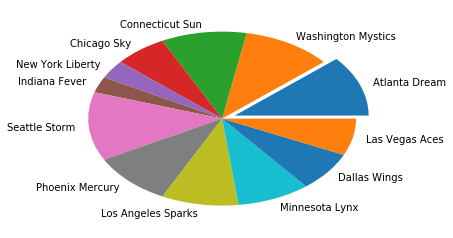

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
explode = (0.1,) + tuple([0 for n in range(len(df.Team)-1)])
# find team with largest wins
# make an explode tuple for that team
_, _ = plt.pie(df.W, labels=df.Team, explode=explode)


Text(0.5,1,'Distribution of wins, WNBA 2018')

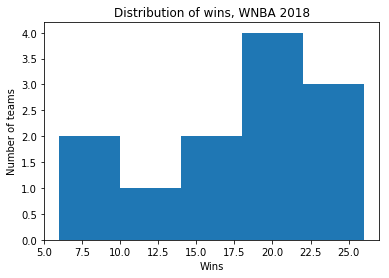

In [40]:
import matplotlib.pyplot as plt
_ = plt.hist(df.W, 5)
plt.xlabel('Wins')
plt.ylabel('Number of teams')
plt.title('Distribution of wins, WNBA 2018')
# plt.xlim([10, 20]) # if we want to change window limits
# plt.yticks() # if we want to change tick marks

In [43]:
df_wins

,Team,W_2016,W_2015,W_2014,W_2013,W_2012,W_2011,W_2010,W_2009,W_2008,W_2007,W_2006,W_2005,W_2004,W_2003,W_2002,W_2001
0,New York Liberty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Connecticut Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Washington Mystics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlanta Dream,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chicago Sky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Indiana Fever,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Minnesota Lynx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Los Angeles Sparks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Phoenix Mercury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dallas Wings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


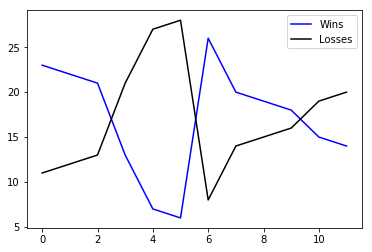

In [71]:
df = df.reset_index(drop=True)
# df

# plt.subplot(121)
plt.plot(df.W, 'b')
# plt.subplot(122)
plt.plot(df.L, 'k')
plt.legend(['Wins', 'Losses'])



In [41]:
season_range = range(2001, 2019)
df_mystics = df_wins.loc[df_wins.index=='Washington Mystics',]
mystics_wins = [df_mystics['W_{}'.format(str(season))].values[0] for season in season_range]
mystics_wins

# Note we can supply a single argument and matplotlib will plot it along the y-axis
# with the x-axis starting at 0.
plt.plot(mystics_wins)


IndexError: index 0 is out of bounds for axis 0 with size 0

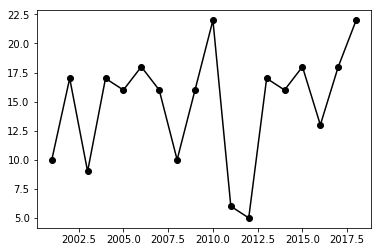

In [127]:
# We can also specify a custom x-axis
# And we can change the line styling with the third argument to plot()
plt.plot(season_range, mystics_wins, 'k-o')

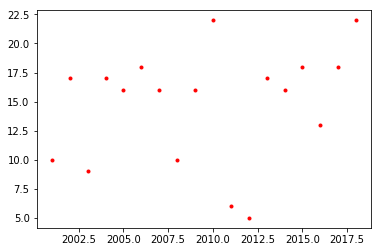

In [119]:
plt.plot(season_range, mystics_wins, 'r.')

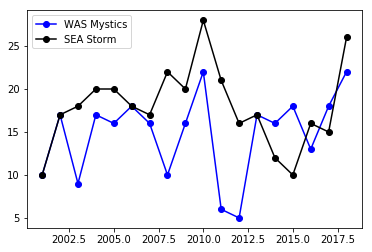

In [136]:
df_storm = df_wins.loc[df_wins.index=='Seattle Storm',]
storm_wins = [df_storm['W_{}'.format(str(season))].values[0] for season in season_range]

plt.plot(season_range, mystics_wins, 'b-o')
plt.plot(season_range, storm_wins, 'k-o')
plt.legend(['WAS Mystics', 'SEA Storm'])

plt.savefig('wins_comparison.png') # export plot

## Animations#

For an example of how to use animations in `matplotlib`, see [this notebook](https://github.com/gmf05/nba/blob/master/scripts/notebooks/svmovie.ipynb) or [this script](https://github.com/gmf05/nba/blob/master/scripts/py/svmovie.py)


5.074914433737329
2.0048906918049547
500


(array([14., 28., 57., 60., 88., 71., 86., 53., 29., 14.]),
 array([0.29368162, 1.23906171, 2.18444181, 3.12982191, 4.07520201,
        5.0205821 , 5.9659622 , 6.9113423 , 7.8567224 , 8.80210249,
        9.74748259]),
 <a list of 10 Patch objects>)

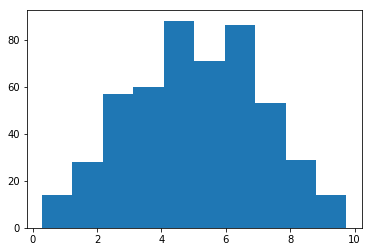

In [82]:
import numpy as np

# ?np.random.randn
# x = np.random.randn(10, 3, 500)
x = np.random.triangular(0, 5, 10, size=500)

# print(x.mean())
# print(x.std())
# print(len(x))

# plt.hist(x)

